In [14]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

import matplotlib.pyplot as plt

from utils.dataset import train_test_load
from model.train import training_loop

In [11]:
test_split = 0.2

train, test = train_test_load("../data/ml-latest-small/ratings.csv", "../data/ml-latest-small/movies.csv", test_split=test_split)

In [12]:
train_loss, train_rmse, test_loss, test_rmse, user_bias, movie_bias, user_embeddings, movie_embeddings, feat_embeddings = training_loop(
    train.user_movies, train.movie_users, test.user_movies, test.movie_users, train.movie_feat, train.feat_movie,
    embedding_dim = 2, r_lambda = 0.1, r_gamma = 0.1, r_tau = 0.1, n_iter = 20,
)

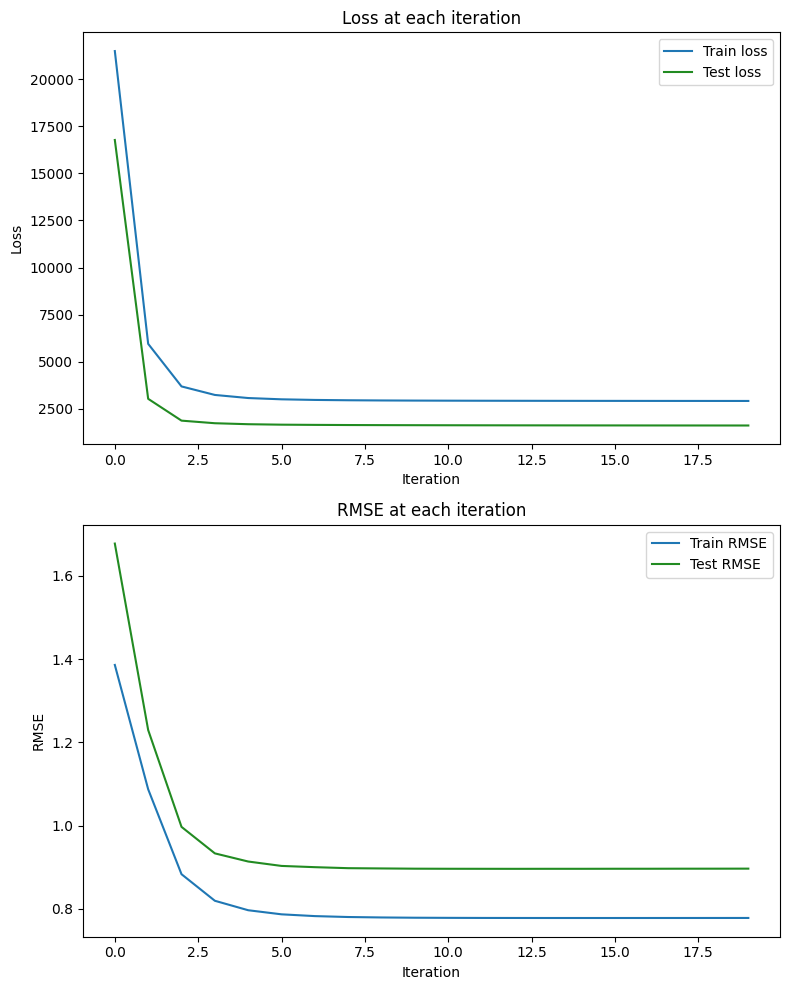

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

axs[0].plot(train_loss, label="Train loss")
axs[0].plot(test_loss, color="forestgreen", label="Test loss")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss at each iteration")
axs[0].legend()

axs[1].plot(train_rmse, label="Train RMSE")
axs[1].plot(test_rmse, color="forestgreen", label="Test RMSE")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("RMSE")
axs[1].set_title("RMSE at each iteration")
axs[1].legend()

plt.tight_layout()
plt.savefig("../artifacts/plot/32m_small_training_with_features.svg", format="svg")
plt.show()

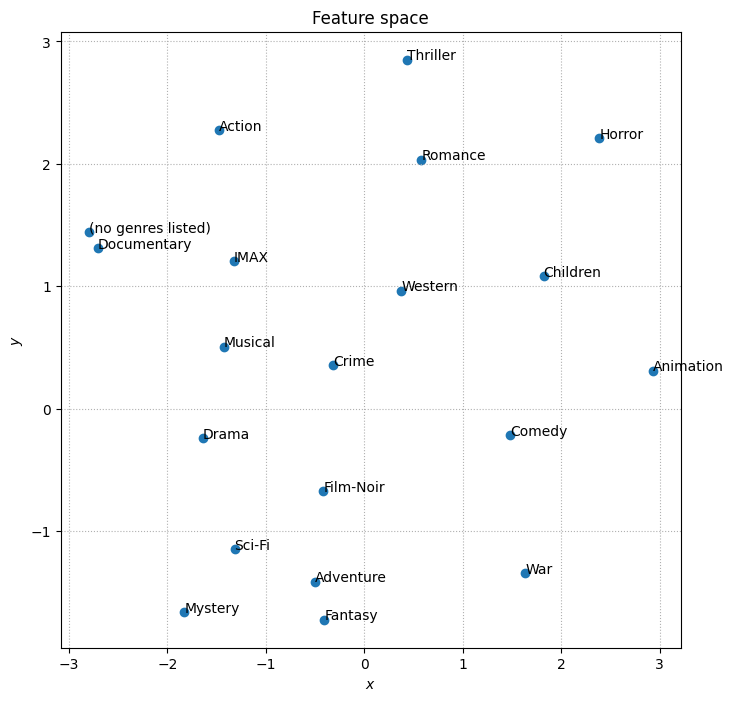

In [22]:
plt.subplots(figsize=(8, 8))

plt.scatter(feat_embeddings[:,0], feat_embeddings[:,1])

for i, x in enumerate(feat_embeddings):
    plt.annotate(train.idx_to_feat_id[i], x)

plt.title("Feature space")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True, linestyle=":")
plt.show()

---